<a href="https://colab.research.google.com/github/IsaacFMendes/repo_Airbnb/blob/main/Analisando_os_Dados_do_Airbnb_Cingapura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Cingapura*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade-estado de Singapura , localizada na Malásia , e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [206]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


%matplotlib inline

In [207]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings_Cingapura.csv")

## Análise dos Dados


Esta etapa tem como objetivo criar uma consciência situcional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido.
* `price` - Preço para alugar o imóvel.
* `minimum_nights` - Quantidade mínima de noites para reservar.
* `number_of_reviews` - Número de reviews que a propriedade possui.
* `last_review` - Data do último review.
* `reviews_per_month` - Quantidade de reviews por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [208]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,595549893585733310,HCK[R&F] 2BR 2-4pax City View/Walk CIQ/Sunset@JB,95993346,Kylie,North Region,Woodlands,1.45838,103.77033,Entire home/apt,58,1,8,2022-05-01,3.43,1,18,8,NaN
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33432,103.78521,Private room,80,92,18,2014-12-26,0.18,1,365,0,NaN
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,143,92,20,2020-01-17,0.16,6,365,0,NaN
3,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,83,92,24,2019-10-13,0.18,6,365,0,NaN
4,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,83,92,47,2020-01-09,0.35,6,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

   Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
   Este dataset que baixamos é a versão "resumida" do Airbnb. No entanto, vale salientar que na mesma página que baixamos o arquivo listings.csv há uma versão mais completa.

In [209]:
# identificar o volume de dados do DataFrame
print ("Entradas: \t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# verificar o tipo de cada variável no dataset
display(df.dtypes)

Entradas: 	 4099
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license` possui mais da metade de seus dados faltantes, algo em torno de 82%.
* As variáveis `reviews_per_month` e `last_review`possuem valores nulos em quase metade das linhas;
* As variáveis `host_name` têm aproximadamente 1% dos valores nulos.





In [210]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

license                           0.823859
reviews_per_month                 0.389851
last_review                       0.389851
host_name                         0.001952
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

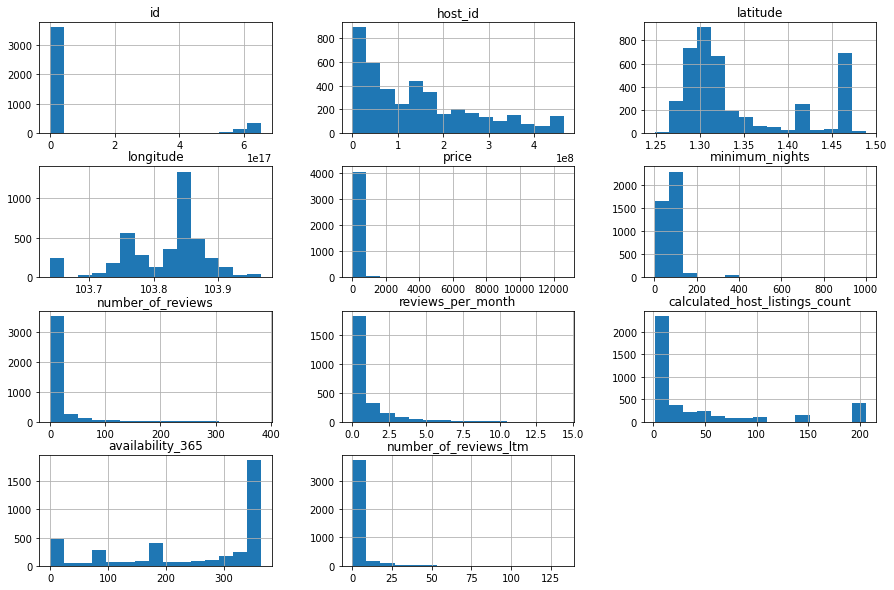

In [211]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes ?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [212]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4099.000000,4099.000000,4099.000000,2501.000000,4099.000000,4099.000000
mean,192.023908,63.722371,13.635277,0.883179,41.630398,248.687241
std,435.730849,69.692068,35.038115,1.424498,63.243989,131.824807
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,0.000000,0.070000,2.000000,153.500000
50%,110.000000,92.000000,1.000000,0.290000,9.000000,325.000000
75%,200.000000,92.000000,9.000000,1.000000,50.000000,364.000000
max,12600.000000,1000.000000,383.000000,14.340000,206.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 4099.0.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### **Boxplot para minimum_nights**

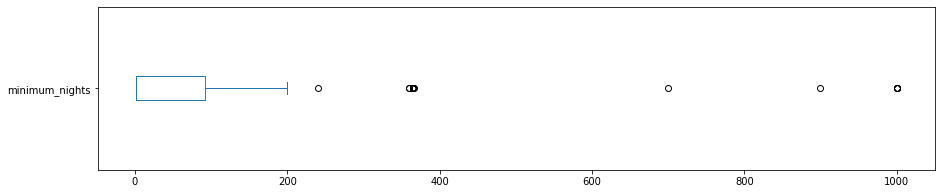

minimum_nights: valores acima de 30: 
2455 entradas
59.8927


In [213]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minum_nights
print("minimum_nights: valores acima de 30: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### **Box para price**

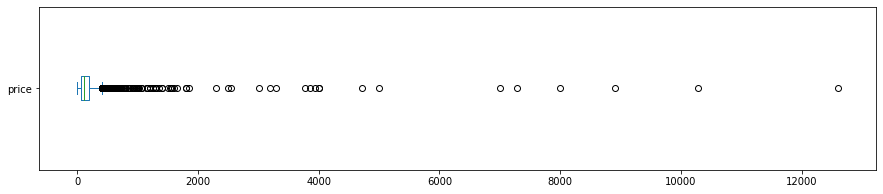


price: valores acima de 1500
27 entradas
0.6587


In [214]:
# price
df.price.plot(kind='box' ,  vert=False, figsize=(15, 3,))
plt.show()

# ver a quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}".format((len(df[df.price > 1500]) / df.shape[0])*100))


#### **Histogramas sem outliers**

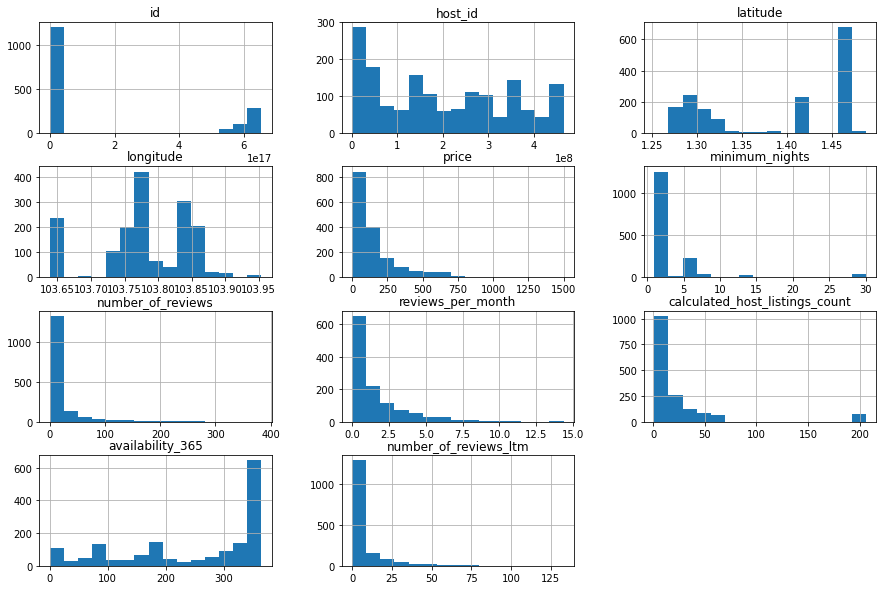

In [215]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

In [216]:
# Ver a média da coluna "price"
x = df.price.mean()
print("A média da coluna price é: {:.3f}".format(x))


A média da coluna price é: 192.024


### **Q6. Qual a correlação existente entre as variáveis**

In [217]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.131445,-0.202048,-0.148964,0.309507,0.043538
minimum_nights,0.131445,1.000000,-0.117485,-0.214158,0.227638,-0.032102
number_of_reviews,-0.202048,-0.117485,1.000000,0.499149,-0.041352,-0.121635
reviews_per_month,-0.148964,-0.214158,0.499149,1.000000,-0.044073,-0.037547
calculated_host_listings_count,0.309507,0.227638,-0.041352,-0.044073,1.000000,0.183521
availability_365,0.043538,-0.032102,-0.121635,-0.037547,0.183521,1.000000


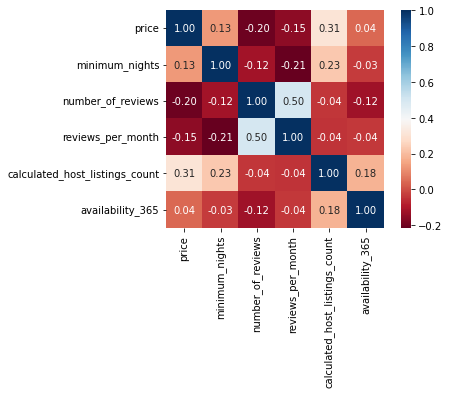

In [218]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [219]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1209
Private room        344
Hotel room           57
Shared room          23
Name: room_type, dtype: int64

In [220]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() /df_clean.shape[0])

Entire home/apt    0.740355
Private room       0.210655
Hotel room         0.034905
Shared room        0.014085
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Cingapura?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [221]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Newton              677.285714
Marina South        618.666667
Southern Islands    553.500000
Orchard             487.942857
Pasir Ris           437.000000
Clementi            378.142857
Hougang             368.500000
Downtown Core       347.404494
Singapore River     347.075000
Museum              321.000000
Name: price, dtype: float64

In [222]:
# ver quantidades de imóveis por Bairro

# Newton
a = df_clean[df_clean.neighbourhood == "Newton"].shape
print("Newton: {}".format(a))

# Marina South
b = (df_clean[df_clean.neighbourhood == "Marina South"].shape)
print("Marina South: {}".format(b))

# Southern Islands
c = (df_clean[df_clean.neighbourhood == "Southern Islands"].shape)
print("Southern Islands: {}".format(c))

# Orchard 
d = (df_clean[df_clean.neighbourhood == "Orchard"].shape)
print("Orchard: {}".format(d))

# Pasir Ris 
e = (df_clean[df_clean.neighbourhood == "Pasir Ris"].shape)
print("Pasir Ris: {}".format(e))

# Clementi  
f = (df_clean[df_clean.neighbourhood == "Clementi"].shape)
print("Clementi: {}".format(f))

# Hougang   
g = (df_clean[df_clean.neighbourhood == "Hougang"].shape)
print("Hougang: {}".format(g))

# Downtown Core  
h = (df_clean[df_clean.neighbourhood == "Downtown Core"].shape)
print("Downtown Core {}".format(h))

# Singapore River   
i = (df_clean[df_clean.neighbourhood == "Singapore River"].shape)
print("Singapore River{}".format(i))

# Museum   
i = (df_clean[df_clean.neighbourhood == "Museum"].shape)
print("Museum{}".format(i))

# ver as 3 entradas para cada bairro
# Newton
df_clean[df_clean.neighbourhood == "Newton"]


Newton: (7, 18)
Marina South: (3, 18)
Southern Islands: (4, 18)
Orchard: (35, 18)
Pasir Ris: (5, 18)
Clementi: (7, 18)
Hougang: (8, 18)
Downtown Core (89, 18)
Singapore River(40, 18)
Museum(5, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
901,22912163,3 Premier Suite Apartment along Orchard Road!,124516401,Orchard Point,Central Region,Newton,1.302360,103.841840,Entire home/apt,1356,6,1,2020-12-31,0.06,5,342,0,Authorised Serviced Apartment
1794,39952401,One Bedroom Deluxe · One Bedroom Apartment at ...,119530352,Oakwood Studios,Central Region,Newton,1.306960,103.835960,Entire home/apt,538,1,0,NaN,NaN,4,327,0,Authorised Serviced Apartment
1795,39952459,One Bedroom Superior · One Bedroom Superior a...,119530352,Oakwood Studios,Central Region,Newton,1.306960,103.835960,Entire home/apt,495,1,0,NaN,NaN,4,327,0,Authorised Serviced Apartment
1796,39952556,Deluxe Studio Apartment with King Bed,119530352,Oakwood Studios,Central Region,Newton,1.305990,103.837080,Entire home/apt,473,1,0,NaN,NaN,4,323,0,Authorised Serviced Apartment
2093,42804408,The Orchard Luxe,8527085,Ben,Central Region,Newton,1.304800,103.837860,Entire home/apt,599,3,0,NaN,NaN,4,61,0,Authorised Serviced Apartment
3013,631553380323771166,"4000 sqft Condo beside Sheraton Hotel w Pool, Gym",383872655,Douglas,Central Region,Newton,1.312039,103.836998,Private room,700,4,1,2022-06-18,1.00,1,158,1,Authorised Serviced Apartment
3066,638889989464776794,"HIGH-LIVING 1-BR in CENTRE OF CITY, ORCHARD",156409670,Tia,Central Region,Newton,1.304780,103.837710,Entire home/apt,580,6,0,NaN,NaN,203,364,0,S9724


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

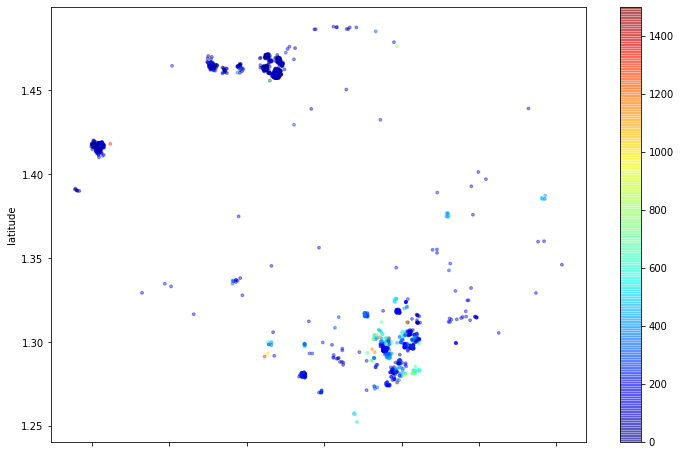

In [223]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
cmap=plt.get_cmap('jet'), figsize=(12,8));

In [235]:
cingapura = folium.Map(location=[1.28333, 103.85],
            zoom_start=11.5)

neighbourhood_cingapura = df[df['neighbourhood'] == 'Newton']

for _, df_clean in neighbourhood_cingapura.iterrows():
      folium.Marker(
        location=[df_clean['latitude'], df_clean['longitude']],
    ).add_to(cingapura)

cingapura

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
y = df.minimum_nights.mean()
print("A média do mínimo de noites é : {:.3f}".format(y))

A média do mínimo de noites é : 63.722


## Conclusões
Tendo como base uma análise resumida dos dados fornecidos do Airbnb sobre a cindade de Cingapura, percebe-se que existe alguns outliers em certas variáveis. Como por exemplo o preço `1356` do local ``Orchard Point`` no bairro de ``Newton``, que de certa forma contribui para ele estar na 1° posição no ranking dos dez bairros mais caros de Cingapura. Além disso, percebe-se que em algumas localidades existe poucos imóveis disponíveis, enquanto outros há vários.O que pode distorcer as informações estatisticas de alguns atributos.
